In [6]:
# Alap Qiskit könyvtárak
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# IBM Quantum account betöltése
service = QiskitRuntimeService(channel="ibm_quantum")
# A szimulátor elindítása és az eredmények kiíratása


{'1010110100': 1024}


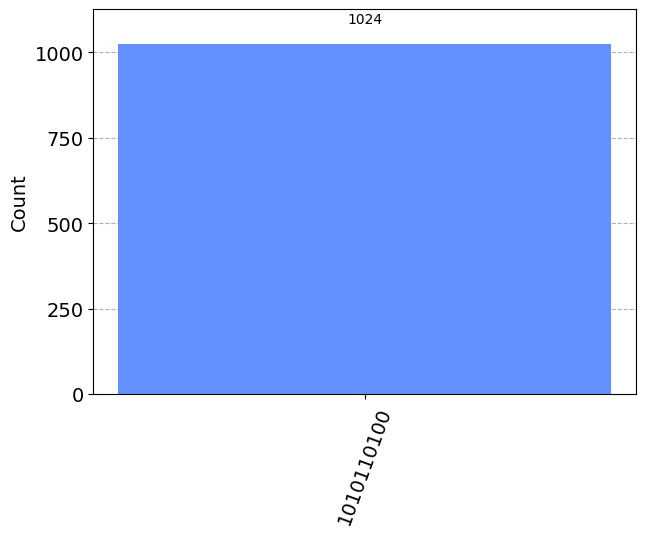

In [7]:
# CONSTANT ORACLE - egyik sem?????
from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_histogram

n = 10  # Number of input qubits
qc = QuantumCircuit(n + 1, n)

# Initialize input qubits randomly
random_inputs = np.random.randint(2, size=n)
for idx, value in enumerate(random_inputs):
    if value == 1:
        qc.x(idx)
        
# Hadamard Gates
for qubit in range(n):
    qc.h(qubit)

# Ancillary Qubit Preparation
qc.x(n)
qc.h(n)

# Constant Oracle Example (CNOT Gate)
qc.barrier()
for i in range(n):
    qc.cx(i, n)
qc.barrier()

# Hadamard Gates (again)
for qubit in range(n):
    qc.h(qubit)

# Measurements
for qubit in range(n):
    qc.measure(qubit, qubit)

# Execution with 1024 shots
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts(qc)

print(counts)
# Plotting Histogram
plot_histogram(counts)


{'1111111111': 1024}


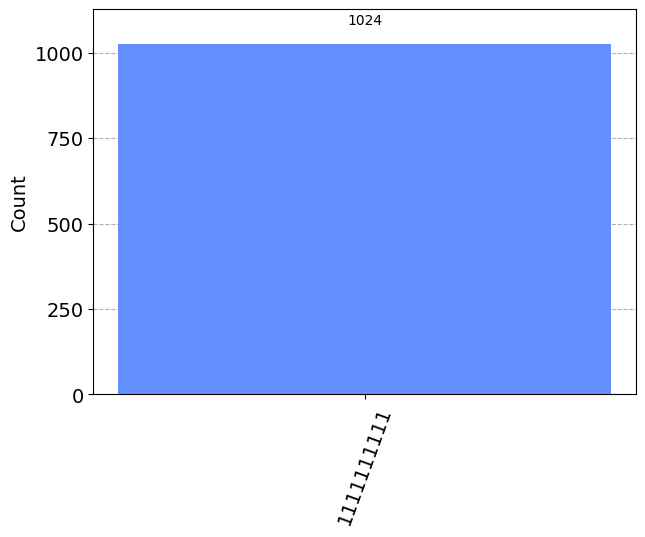

In [8]:
# BALANCED ORACLE
from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_histogram

n = 10  # Number of input qubits
qc = QuantumCircuit(n + 1, n)
"""
# Initialize input qubits randomly
random_inputs = np.random.randint(2, size=n)
for idx, value in enumerate(random_inputs):
    if value == 1:
        qc.x(idx)
        
# Print the randomly initialized input bits
print("Randomly initialized input bits:", random_inputs)"""
# Hadamard Gates
for qubit in range(n):
    qc.h(qubit)

# Ancillary Qubit Preparation
qc.x(n)
qc.h(n)

# Constant Oracle Example (CNOT Gate)
qc.barrier()
for i in range(n):
    qc.cx(i, n)
qc.barrier()

# Hadamard Gates (again)
for qubit in range(n):
    qc.h(qubit)

# Measurements
for qubit in range(n):
    qc.measure(qubit, qubit)

# Execution with 1024 shots
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts(qc)

print(counts)
# Plotting Histogram
plot_histogram(counts)


{'0000000000': 1024}


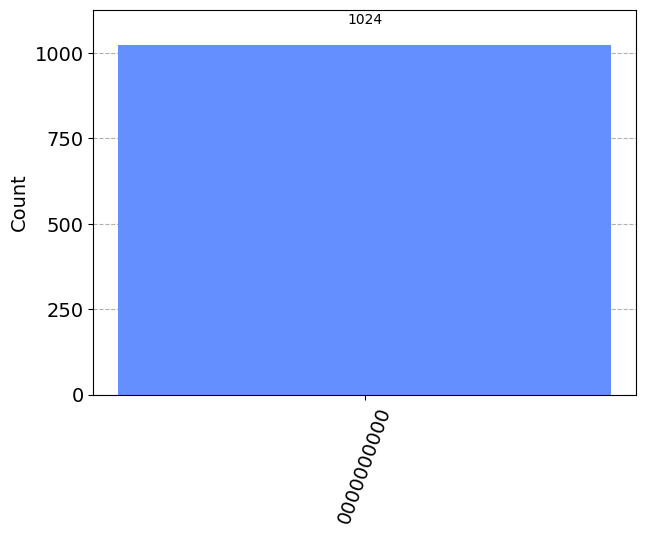

In [6]:
#constant oracle
from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_histogram
import numpy as np

n = 10  # a bemeneti kubitok száma
qc = QuantumCircuit(n + 1, n)

# Hadamard kapuk alkalmazása
for qubit in range(n):
    qc.h(qubit)


# A segéd qubit előkészítése
qc.x(n)
qc.h(n)

# Konstans oracle példa - további X kapu a segéd kubiten
qc.barrier()
qc.x(n)  
# X kapu alkalmazása a segéd kubiten
qc.barrier()

for qubit in range(n):
    qc.h(qubit)
# Mérések végrehajtása
for qubit in range(n):
    qc.measure(qubit, qubit)

# A szimulátor elindítása és az eredmények kiíratása
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts(qc)

print(counts)
#print(qc)
plot_histogram(counts)

In [28]:
from qiskit import Aer, QuantumCircuit, execute

# Number of qubits
n = 5

# Quantum circuit
qc = QuantumCircuit(n, n)

# Initialize qubits randomly
random_qubits = [0, 1] * (n // 2)  # Generating an alternating sequence of 0s and 1s
for idx, value in enumerate(random_qubits):
    if value == 1:
        qc.x(idx)

# Measurements
qc.measure(range(n), range(n))

# Execute the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1).result()

# Get counts
counts = result.get_counts(qc)

# Print the results
print("Randomly generated qubits:", random_qubits)
print("Measurement results:", counts)


Randomly generated qubits: [0, 1, 0, 1]
Measurement results: {'01010': 1}
